In [1]:
#import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cluster import KMeans # import k-means from clustering stage

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#import dataframe
path = 'C:\\Users\Galvin\Desktop\Singapore_Neighbourhoods.csv'
df = pd.read_csv(path)
df.head()

,Neighbourhood,Latitude,Longitude
0,Ang Mo Kio,1.37173,103.847640
1,Bedok,1.32466,103.932380
2,Bishan,1.35040,103.848747
3,Boon Lay,1.32380,103.706090
4,Bukit Batok,1.35002,103.749268


In [3]:
#create map with markers
map_sg = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)  
    
map_sg

In [4]:
#Foursquare credentials
CLIENT_ID = 'RY1QWGPCV4PQCWFK300TZXIPP0CTFR0OR11TNZ4S55NJ1HTU'
CLIENT_SECRET = 'CIWG2SXDCLFBWVQXOFBZFBP5QENTINCZFFY5F3BX5UTDRAX1'
VERSION = '20180605'

In [5]:
#create function to explore neighborhood venues
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [6]:
#run function
sg_venues = getNearbyVenues(names=df['Neighbourhood'],latitudes=df['Latitude'], longitudes=df['Longitude'])

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
Novena
Orchard
Outram
Pasir Ris
Paya lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


In [7]:
#analyze neighborhood using one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Neighbourhood'] = sg_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

,Neighbourhood,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#group neighborhood by mean of categorical occurence
sg_grouped = sg_onehot.groupby('Neighbourhood').mean().reset_index()
sg_grouped.head()

,Neighbourhood,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Ang Mo Kio,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,Bedok,0.0,0.0,0.0,0.0,0.015873,0.0,0.0,0.0,0.063492,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.015873,0.0,0.000000,0.000000
2,Bishan,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022727,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,Boon Lay,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.066667,0.066667
4,Bukit Batok,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [9]:
#create function to return common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [10]:
#create dataframe for top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = sg_grouped['Neighbourhood']

for ind in np.arange(sg_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Food Court,Dessert Shop,Coffee Shop,Japanese Restaurant,Bubble Tea Shop,Snack Place,Fast Food Restaurant,Supermarket,Seafood Restaurant,Fried Chicken Joint
1,Bedok,Chinese Restaurant,Coffee Shop,Café,Asian Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Supermarket
2,Bishan,Food Court,Coffee Shop,Bubble Tea Shop,Café,Chinese Restaurant,Supermarket,Japanese Restaurant,Ice Cream Shop,Cosmetics Shop,Dumpling Restaurant
3,Boon Lay,Exhibit,Zoo Exhibit,Fishing Spot,Lake,BBQ Joint,Bus Stop,Scenic Lookout,Bus Station,Water Park,Zoo
4,Bukit Batok,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Bus Line,Food Court,Indian Restaurant,Malay Restaurant,Park,Sandwich Place,Shopping Mall


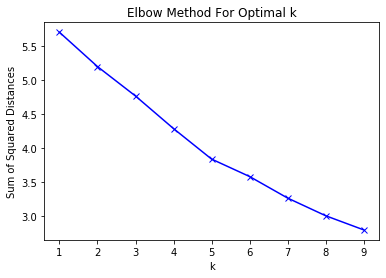

In [46]:
#finding optimal k with elbow method
sumofsqdist = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(sg_grouped.drop(columns=['Neighbourhood']))
    sumofsqdist.append(model.inertia_)
    
plt.plot(range(1,10), sumofsqdist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
#initaite k-mean clustering
kclusters = 5

sg_grouped_clustering = sg_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 3])

In [13]:
#create merged dataframe
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sg_merged = df

# merge sg_grouped with df to add latitude/longitude for each neighborhood
sg_merged = sg_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

In [14]:
#clean merged dataframe
sg_merged = sg_merged.dropna()

In [15]:
# create map with clusters
map_clusters = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Neighbourhood'], sg_merged['Cluster Labels'].astype('int64')):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [16]:
#examine cluster 1
sg_merged.loc[sg_merged['Cluster Labels'] == 0, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]].head()

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,0.0,Food Court,Dessert Shop,Coffee Shop,Japanese Restaurant,Bubble Tea Shop,Snack Place,Fast Food Restaurant,Supermarket,Seafood Restaurant,Fried Chicken Joint
1,Bedok,0.0,Chinese Restaurant,Coffee Shop,Café,Asian Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Supermarket
2,Bishan,0.0,Food Court,Coffee Shop,Bubble Tea Shop,Café,Chinese Restaurant,Supermarket,Japanese Restaurant,Ice Cream Shop,Cosmetics Shop,Dumpling Restaurant
3,Boon Lay,0.0,Exhibit,Zoo Exhibit,Fishing Spot,Lake,BBQ Joint,Bus Stop,Scenic Lookout,Bus Station,Water Park,Zoo
4,Bukit Batok,0.0,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Bus Line,Food Court,Indian Restaurant,Malay Restaurant,Park,Sandwich Place,Shopping Mall


In [17]:
#examine cluster 2
sg_merged.loc[sg_merged['Cluster Labels'] == 1, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]].head()

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Simpang,1.0,Café,Gay Bar,Zoo Exhibit,Food Stand,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fishing Spot,Fish & Chips Shop


In [18]:
#examine cluster 3
sg_merged.loc[sg_merged['Cluster Labels'] == 2, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]].head()

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Water Catchment,2.0,Trail,Ethiopian Restaurant,Food Truck,Food Stand,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fishing Spot,Fish & Chips Shop


In [19]:
#examine cluster 4
sg_merged.loc[sg_merged['Cluster Labels'] == 3, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]].head()

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Changi,3.0,Gym / Fitness Center,Ski Chalet,Ethiopian Restaurant,Food Stand,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fishing Spot,Fish & Chips Shop


In [20]:
#examine cluster 5
sg_merged.loc[sg_merged['Cluster Labels'] == 4, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]].head()

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Kallang,4.0,Coffee Shop,Chinese Restaurant,Food Court,Indian Restaurant,Supermarket,Photography Studio,Optical Shop,Café,Cafeteria,Pool
31,Punggol,4.0,Bus Station,Food Court,Coffee Shop,High School,Chinese Restaurant,Bus Stop,Zoo Exhibit,Exhibit,Food Stand,Food & Drink Shop
49,Western Islands,4.0,Coffee Shop,Food Court,Zoo Exhibit,Ethiopian Restaurant,Food Truck,Food Stand,Food & Drink Shop,Flower Shop,Flea Market,Fishing Spot
50,Western Water Catchment,4.0,Coffee Shop,Bus Station,Café,Zoo Exhibit,Event Space,Food Stand,Food Court,Food & Drink Shop,Flower Shop,Flea Market


#### Cluster 1: Food court/Restaurant
#### Cluster 2: Cafe/Bars
#### Cluster 3: Park/Trails
#### Cluster 4: Fitness/Recreation
#### Cluster 5: Coffee shop/Bus station